<a href="https://colab.research.google.com/github/tazar09/heroes_3/blob/main/h3_heroes%5B01.noi2023%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Requirements

In [136]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
pd.options.display.max_rows = 300
import matplotlib.pyplot as plt

# Importing data

In [2]:
df1 = pd.read_html('https://heroes.thelazy.net/index.php/List_of_heroes_(HotA)')
df1[0].head()

,Name,Class,Unnamed: 2,Specialty,Unnamed: 4,Skill 1,Unnamed: 6,Skill 2,Unnamed: 8,Spell
0,Anabel,Captain,NaN,Pirates,NaN,Basic Offense,NaN,Basic Archery,NaN,NaN
1,Cassiopeia,Captain,NaN,Nymphs,NaN,Basic Offense,NaN,Basic Tactics,NaN,NaN
2,Corkes,Captain,NaN,Offense,NaN,Basic Offense,NaN,Basic Pathfinding,NaN,NaN
3,Derek,Captain,NaN,Crew Mates,NaN,Basic Offense,NaN,Basic Leadership,NaN,NaN
4,Elmore,Captain,NaN,Navigation,NaN,Advanced Navigation,NaN,NaN,NaN,NaN


# Creating dataframe

## Data preprocessing

In [3]:
df = df1[0].copy()
df = df.drop(axis = 1, labels = ['Unnamed: 2','Unnamed: 4', 'Unnamed: 6', 'Unnamed: 8'])
df.columns = ['name', 'class', 'specialty', 'skill_1', 'skill_2', 'spell']

## Dropping and renaming

In [4]:
skill1 = df['skill_1'].str.split(expand = True, n = 1)
skill2 = df['skill_2'].str.split(expand = True, n = 1)
df = pd.concat([df, skill1, skill2], axis = 1)
df.columns = ['name', 'class', 'specialty', 'skill_1', 'skill_2', 'spell', 'skill_1_level', 'skill_1_name', 'skill_2_level', 'skill_2_name']

In [5]:
df = df.drop(axis = 1, labels = ['skill_1', 'skill_2'])

In [6]:
df = df[['name', 'class', 'specialty', 'skill_1_name', 'skill_1_level', 'skill_2_name','skill_2_level', 'spell']]
df['spell'] = df['spell'].fillna('')
df['skill_2_name'] = df['skill_2_name'].fillna('')
df['skill_2_level'] = df['skill_2_level'].fillna('')

## Creating new columns.

In [7]:
df['count'] = 1
df['spell_tf'] = df['spell'].apply(lambda x: 0 if x == '' else 1)

## Data from other sources

### Data from Towns doc

In [8]:
towns = pd.read_html('http://heroes.thelazy.net/index.php/List_of_all_town_names')
towns = list(towns[1]['Town'].unique())

In [9]:
towns = ['Castle', 'Rampart', 'Tower', 'Inferno', 'Necropolis','Dungeon', 'Stronghold' ,'Fortress','Conflux', 'Cove']

In [10]:
classes = list(df['class'].unique())
classes.remove('Captain')
classes.remove('Navigator')
classes.insert(18, 'Captain')
classes.insert(19, 'Navigator')
classes[8] = 'Death Knight'

In [11]:
towns2 = []
temp_list = []
for i in towns:
  temp_list = [i, i]
  towns2.append(temp_list)
towns2x = [element for sublist in towns2 for element in sublist]
len(classes), len(towns2x)

(20, 20)

In [12]:
class_towns = pd.DataFrame({'class': classes, 'town': towns2x})
df = df.merge(class_towns, how='left', on='class')

In [13]:
df.columns = ['name', 'class', 'specialty', 'skill_1', 'level_1',
       'skill_2', 'level_2', 'spell', 'count', 'spell_tf', 'town']

In [14]:
df['class_2'] = df['skill_1'].apply(lambda x: 'magic' if x == 'Wisdom' else 'might')
df.iloc[81, 11] = 'might'  #Rashka
df.iloc[101, 11] = 'magic' #Aislinn

In [15]:
df = df[['name', 'class', 'class_2', 'specialty', 'level_1', 'skill_1',
       'level_2', 'skill_2', 'spell', 'count', 'spell_tf', 'town']]

In [16]:
df.iloc[91:101 , 11] = 'Necropolis'

### Data from creatures_csv

In [17]:
creatures = pd.read_csv('/content/df_h3.csv')
creatures = creatures[['Name', 'Town','Upgraded']]

In [18]:
creatures['specialty'] = creatures['Name'].apply(lambda x: x + 's')
creatures = creatures[creatures['Upgraded'] == 0].reset_index(drop = True)

In [19]:
creatures['specialty'] = creatures['specialty'].apply(lambda x: 'convert' if x.endswith('mans') else x)

## Manually correcting errors

In [20]:
# creatures[creatures['specialty'] == 'convert']
creatures.iloc[0, 3] = 'Pikemen'
creatures.iloc[3, 3] = 'Swordsmen'
creatures.iloc[50, 3] = 'Lizardmen'

creatures.iloc[64, 3] = 'Crew Mate'
creatures.iloc[65, 3] = 'Sea Dogs'
creatures.iloc[67, 3] = 'Sea Witches'
creatures.iloc[68, 3] = 'Nix'

creatures.iloc[8, 3] = 'Dwarves'
creatures.iloc[9, 3] = 'Elves'
creatures.iloc[10, 3] = 'Pegasi'
creatures.iloc[26, 3] = 'Efreet'
creatures.iloc[32, 3] = 'Liches'
creatures.iloc[32, 3] = 'Liches'
creatures.iloc[36, 3] = 'Harpies'
creatures.iloc[47, 3] = 'Cyclops'
creatures.iloc[51, 3] = 'Cyclops'

creatures.iloc[11, 3] = 'Dendroids'
creatures.iloc[16, 3] = 'Golems'
creatures.iloc[17, 3] = 'Magi'

# creatures.head(5)

## Merging data (df1)

## *Column on creature specialty*

In [21]:
df2 = df.merge(creatures, how = 'left', on = 'specialty', suffixes = None)
df2 = df2.drop(axis = 0, index = 135).reset_index(drop = True)

## Manually correcting errors

In [22]:
df2.iloc[73,12] = 'Enchanter'
df2.iloc[0,12] = 'Pirate'
df2.iloc[3,12] = 'Crew Mate'
df2.iloc[9,12] = 'Sea Dog'
df2.iloc[96,12] = 'Walking Dead'
df2.iloc[150, 12] = 'Serpent Fly'
df2 = df2.drop(axis = 0, index = 135).reset_index(drop = True)

In [23]:
df2['Name'] = df2['Name'].fillna('')
df2 = df2.drop(axis=1, labels = ['Town', 'Upgraded', 'count', 'spell_tf'])

In [24]:
df2.columns = ['name', 'class', 'class_2', 'specialty', 'level_1', 'skill_1', 'level_2', 'skill_2', 'skill_spell', 'town', 'skill_creature']

In [25]:
df2.head()

,name,class,class_2,specialty,level_1,skill_1,level_2,skill_2,skill_spell,town,skill_creature
0,Anabel,Captain,might,Pirates,Basic,Offense,Basic,Archery,,Cove,Pirate
1,Cassiopeia,Captain,might,Nymphs,Basic,Offense,Basic,Tactics,,Cove,Nymph
2,Corkes,Captain,might,Offense,Basic,Offense,Basic,Pathfinding,,Cove,
3,Derek,Captain,might,Crew Mates,Basic,Offense,Basic,Leadership,,Cove,Crew Mate
4,Elmore,Captain,might,Navigation,Advanced,Navigation,,,,Cove,


## Recreating (df)

In [26]:
df = df2.copy()
df.head()

,name,class,class_2,specialty,level_1,skill_1,level_2,skill_2,skill_spell,town,skill_creature
0,Anabel,Captain,might,Pirates,Basic,Offense,Basic,Archery,,Cove,Pirate
1,Cassiopeia,Captain,might,Nymphs,Basic,Offense,Basic,Tactics,,Cove,Nymph
2,Corkes,Captain,might,Offense,Basic,Offense,Basic,Pathfinding,,Cove,
3,Derek,Captain,might,Crew Mates,Basic,Offense,Basic,Leadership,,Cove,Crew Mate
4,Elmore,Captain,might,Navigation,Advanced,Navigation,,,,Cove,


## *Column on resource specialty*

In [27]:
df['skill_resource'] = ''
df.head()

,name,class,class_2,specialty,level_1,skill_1,level_2,skill_2,skill_spell,town,skill_creature,skill_resource
0,Anabel,Captain,might,Pirates,Basic,Offense,Basic,Archery,,Cove,Pirate,
1,Cassiopeia,Captain,might,Nymphs,Basic,Offense,Basic,Tactics,,Cove,Nymph,
2,Corkes,Captain,might,Offense,Basic,Offense,Basic,Pathfinding,,Cove,,
3,Derek,Captain,might,Crew Mates,Basic,Offense,Basic,Leadership,,Cove,Crew Mate,
4,Elmore,Captain,might,Navigation,Advanced,Navigation,,,,Cove,,


In [28]:
pattern_resource = '|'.join(['Crystal', 'Mercury', 'Gold', 'Sulfur', 'Gems'])
index_resource = df[df['specialty'].str.contains(pattern_resource)].index.values

In [29]:
df.iloc[index_resource, [11]] = df.iloc[index_resource, [3]].values.flatten().reshape(15,1)

# Column on primary skills

In [30]:
secondary_skills0 = pd.read_html('https://heroes.thelazy.net/index.php/Hero_class')[2]

In [31]:
list_of_secondary_skills_ordered = list(secondary_skills0['Skill.1'])

In [32]:
del list_of_secondary_skills_ordered[0]
list_of_secondary_skills_ordered

['Air Magic',
 'Archery',
 'Armorer',
 'Artillery',
 'Ballistics',
 'Diplomacy',
 'Eagle Eye',
 'Earth Magic',
 'Estates',
 'Fire Magic',
 'First Aid',
 'Intelligence',
 'Leadership',
 'Learning',
 'Logistics',
 'Luck',
 'Mysticism',
 'Navigation',
 'Necromancy',
 'Offense',
 'Pathfinding',
 'Resistance',
 'Scholar',
 'Scouting',
 'Sorcery',
 'Tactics',
 'Water Magic',
 'Wisdom',
 'Interference']

## *Column on secondary skill specialty*

Some heroes specialize in a secondary skill, like Necromancy, Armorer, Navigation, Offense etc.

In [33]:
skill_secondary = pd.read_html('https://heroes.thelazy.net/index.php/Hero_class')[2]

In [34]:
skill_secondary.head()

,Skill,Skill.1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Air Magic,3.0,4.0,1.0,2.0,4.0,6.0,2.0,3.0,...,1.0,2.0,3.0,3.0,1.0,3.0,2.0,6.0,3.0,6.0
2,NaN,Archery,5.0,3.0,8.0,5.0,5.0,2.0,6.0,4.0,...,6.0,2.0,7.0,4.0,7.0,3.0,8.0,2.0,9.0,6.0
3,NaN,Armorer,5.0,3.0,8.0,3.0,8.0,1.0,7.0,4.0,...,6.0,1.0,6.0,4.0,10.0,4.0,5.0,1.0,2.0,1.0
4,NaN,Artillery,5.0,2.0,6.0,1.0,4.0,1.0,5.0,4.0,...,8.0,1.0,8.0,4.0,8.0,1.0,8.0,1.0,5.0,1.0


In [35]:
hero_secondary_skills = pd.read_html('https://heroes.thelazy.net/index.php/Hero_class')[3]

In [36]:
hero_secondary_skills.drop(axis = 0, index = 0, inplace=True)
hero_secondary_skills.drop(axis = 1, labels = 'Town', inplace=True)

In [37]:
list_of_secondary_skills_ordered.insert(0, 'hero_class')
hero_secondary_skills.columns = list_of_secondary_skills_ordered

In [38]:
hero_secondary_skills.head()

,hero_class,Air Magic,Archery,Armorer,Artillery,Ballistics,Diplomacy,Eagle Eye,Earth Magic,Estates,...,Offense,Pathfinding,Resistance,Scholar,Scouting,Sorcery,Tactics,Water Magic,Wisdom,Interference
1,Knight,3.0,5.0,5.0,5.0,8.0,4.0,2.0,2.0,6.0,...,7.0,4.0,5.0,1.0,4.0,1.0,7.0,4.0,3.0,5.0
2,Cleric,4.0,3.0,3.0,2.0,4.0,7.0,6.0,3.0,3.0,...,4.0,2.0,2.0,6.0,3.0,5.0,2.0,4.0,7.0,0.0
3,Ranger,1.0,8.0,8.0,6.0,4.0,4.0,2.0,3.0,2.0,...,5.0,7.0,9.0,1.0,7.0,2.0,5.0,3.0,3.0,9.0
4,Druid,2.0,5.0,3.0,1.0,4.0,4.0,7.0,4.0,3.0,...,1.0,5.0,1.0,8.0,2.0,6.0,1.0,4.0,8.0,0.0
5,Alchemist,4.0,5.0,8.0,4.0,6.0,3.0,3.0,3.0,4.0,...,6.0,4.0,5.0,3.0,4.0,3.0,4.0,2.0,6.0,5.0


In [39]:
hero_secondary_skills.T.to_csv("secondary_skills_heroes.csv")

In [51]:
s_tier = np.linspace(5,6,4, endpoint = False)
a_tier = np.linspace(4,5,9, endpoint = False)
b_tier = np.linspace(3,4,6, endpoint = False)
c_tier = np.linspace(2,3,5, endpoint = False)
d_tier = np.linspace(1,2,2, endpoint = False)
e_tier = np.linspace(0,2,3, endpoint = False)

In [119]:
all_scores = np.r_[s_tier, a_tier, b_tier, c_tier, d_tier, e_tier]
pd.DataFrame(list(all_scores)).sort_values(by = 0, ascending = True)

,0
26,0.000000
27,0.666667
24,1.000000
28,1.333333
25,1.500000
19,2.000000
20,2.200000
21,2.400000
22,2.600000
23,2.800000


In [122]:
dfs = pd.read_excel('/content/secondary_skills_heroes.xlsx')

In [123]:
dfs.head()

,hero_class,Value,Knight,Cleric,Ranger,Druid,Alchemist,Wizard,Demoniac,Heretic,...,Overlord,Warlock,Barbarian,Battle Mage,Beastmaster,Witch,Planeswalker,Elementalist,Captain,Navigator
0,Air Magic,4.777778,3,4,1,2,4,6,2,3,...,1,2,3,3,1,3,2,6,3,6
1,Archery,4.666667,5,3,8,5,5,2,6,4,...,6,2,7,4,7,3,8,2,9,6
2,Armorer,5.000000,5,3,8,3,8,1,7,4,...,6,1,6,4,10,4,5,1,2,1
3,Artillery,2.600000,5,2,6,1,4,1,5,4,...,8,1,8,4,8,1,8,1,5,1
4,Ballistics,1.333333,8,4,4,4,6,4,7,6,...,7,6,8,6,7,8,8,4,5,2


In [124]:
def hero_value(df = dfs, hero_class = 'Knight'):
  value_vector = np.array(dfs['Value'])
  hero_probs = np.array(dfs[hero_class])
  hero_value = value_vector * hero_probs
  return round(np.sum(hero_value),2)

In [125]:
hero_value()

416.35

In [126]:
hero_value_dic = {}

for hero in dfs.columns[2:]:
  hero_value_dic[hero] = hero_value(dfs, hero)


In [127]:
index = np.arange(29)
hero_value_df = pd.DataFrame(hero_value_dic, index = index)


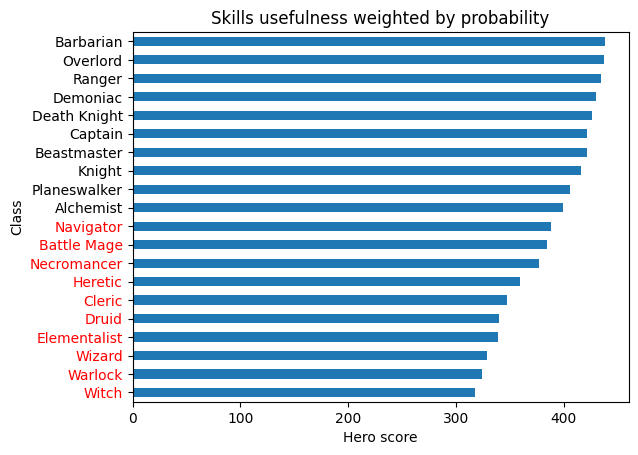

In [142]:
hero_value_df.loc[0].sort_values(ascending = True).plot(kind = 'barh', xlabel = 'Hero score', ylabel = 'Class', title = 'Skills usefulness weighted by probability')

ax = plt.gca()
for tick in ax.get_yticklabels():
    if tick.get_text() in ['Witch', 'Warlock', 'Wizard', 'Elementalist', 'Druid', 'Cleric', 'Heretic', 'Necromancer', 'Battle Mage', 'Navigator']:
        tick.set_color('red')

In [94]:
hero_value_dic

{'Knight': 380.04,
 'Cleric': 407.54,
 'Ranger': 392.92,
 'Druid': 416.07,
 'Alchemist': 386.99,
 'Wizard': 427.71,
 'Demoniac': 365.06,
 'Heretic': 395.04,
 'Death Knight': 364.27,
 'Necromancer': 375.47,
 'Overlord': 359.49,
 'Warlock': 429.86,
 'Barbarian': 359.26,
 'Battle Mage': 370.82,
 'Beastmaster': 370.21,
 'Witch': 430.0,
 'Planeswalker': 358.13,
 'Elementalist': 416.21,
 'Captain': 360.3,
 'Navigator': 380.07}

In [66]:
np.array(dfs['Value'])

array([2.      , 2.2     , 1.333333, 4.444444, 5.      , 3.666667,
       5.75    , 0.      , 4.555556, 3.833333, 5.25    , 2.8     ,
       3.      , 3.166667, 5.5     , 1.5     , 4.      , 4.666667,
       3.333333, 2.4     , 0.666667, 4.111111, 4.222222, 4.333333,
       3.5     , 4.888889, 1.      , 4.777778, 2.6     ])

## *Column on spell skill specialty*

Some heroes specialize in casting a skill, like Ressurection, Inferno etc.

In [41]:
spell_df = pd.read_html('https://heroes.thelazy.net/index.php/List_of_spells')[0]

In [42]:
spell_df.columns = ['skill_spell', 'spell_level', 'spell_class', 'effect']

In [43]:
df = df[['name', 'class', 'class_2', 'town','specialty', 'level_1', 'skill_1','level_2', 'skill_2', 'skill_creature','skill_resource', 'skill_spell']]
df = df.merge(spell_df, how='left', on='skill_spell')
df = df.fillna('').drop('effect', axis = 1)

In [44]:
df['spell_level'] = df['spell_level'].apply(lambda x: int(x) if isinstance(x, float) else 0)

In [45]:
df.head(25)

,name,class,class_2,town,specialty,level_1,skill_1,level_2,skill_2,skill_creature,skill_resource,skill_spell,spell_level,spell_class
0,Anabel,Captain,might,Cove,Pirates,Basic,Offense,Basic,Archery,Pirate,,,0,
1,Cassiopeia,Captain,might,Cove,Nymphs,Basic,Offense,Basic,Tactics,Nymph,,,0,
2,Corkes,Captain,might,Cove,Offense,Basic,Offense,Basic,Pathfinding,,,,0,
3,Derek,Captain,might,Cove,Crew Mates,Basic,Offense,Basic,Leadership,Crew Mate,,,0,
4,Elmore,Captain,might,Cove,Navigation,Advanced,Navigation,,,,,,0,
5,Illor,Captain,might,Cove,Stormbirds,Basic,Armorer,Basic,Tactics,Stormbird,,,0,
6,Jeremy,Captain,might,Cove,Cannon,Basic,Offense,Basic,Artillery,,,,0,
7,Leena,Captain,might,Cove,Gold,Basic,Pathfinding,Basic,Estates,,Gold,,0,
8,Miriam,Captain,might,Cove,Scouting,Basic,Logistics,Basic,Scouting,,,,0,
9,Bidley,Captain,might,Cove,Sea Dogs,Advanced,Offense,,,Sea Dog,,,0,


In [46]:
dfu = pd.pivot_table(df, index = 'town',  columns = 'spell_class', values = 'spell_level', aggfunc = 'count', fill_value = '', margins = False)

In [47]:
dfu = dfu.reset_index()
dfu.shape

(10, 7)

In [48]:
dfu.fillna(0, inplace = True)
dfu.head()
dfu.replace({'': 0})

spell_class,town,,Air Magic,All Schools,Earth Magic,Fire Magic,Water Magic
0,Castle,12.0,0.0,0.0,1.0,1,6.0
1,Conflux,8.0,2.0,1.0,2.0,2,1.0
2,Cove,11.0,1.0,0.0,1.0,1,5.0
3,Dungeon,8.0,1.0,2.0,6.0,1,0.0
4,Fortress,8.0,0.0,1.0,5.0,2,2.0
5,Inferno,9.0,2.0,0.0,2.0,3,1.0
6,Necropolis,0.0,3.0,4.0,10.0,1,0.0
7,Rampart,11.0,2.0,1.0,0.0,2,2.0
8,Stronghold,9.0,3.0,1.0,2.0,2,0.0
9,Tower,0.0,7.0,4.0,4.0,1,1.0


## *Column on war machines specialty*

In [49]:
df[(df['specialty'] == 'Cannon') | (df['specialty'] == 'Ballista')]

,name,class,class_2,town,specialty,level_1,skill_1,level_2,skill_2,skill_creature,skill_resource,skill_spell,spell_level,spell_class
6,Jeremy,Captain,might,Cove,Cannon,Basic,Offense,Basic,Artillery,,,,0,
19,Christian,Knight,might,Castle,Ballista,Basic,Leadership,Basic,Artillery,,,,0,
64,Torosar,Alchemist,might,Tower,Ballista,Basic,Mysticism,Basic,Tactics,,,Magic Arrow,1,All Schools
80,Pyre,Demoniac,might,Inferno,Ballista,Basic,Logistics,Basic,Artillery,,,,0,
100,Ranloo,Death Knight,might,Necropolis,Ballista,Basic,Necromancy,Basic,Artillery,,,Haste,1,Air Magic
110,Arlach,Overlord,might,Dungeon,Ballista,Basic,Offense,Basic,Artillery,,,,0,
129,Gurnisson,Barbarian,might,Stronghold,Ballista,Basic,Offense,Basic,Artillery,,,,0,
148,Gerwulf,Beastmaster,might,Fortress,Ballista,Basic,Armorer,Basic,Artillery,,,,0,


In [50]:
df[df['town']=='Inferno']

,name,class,class_2,town,specialty,level_1,skill_1,level_2,skill_2,skill_creature,skill_resource,skill_spell,spell_level,spell_class
74,Calh,Demoniac,might,Inferno,Gogs,Basic,Archery,Basic,Scouting,Gog,,,0,
75,Fiona,Demoniac,might,Inferno,Hell Hounds,Advanced,Scouting,,,Hell Hound,,,0,
76,Ignatius,Demoniac,might,Inferno,Imps,Basic,Tactics,Basic,Interference,Imp,,,0,
77,Marius,Demoniac,might,Inferno,Demons,Advanced,Armorer,,,Demon,,,0,
78,Nymus,Demoniac,might,Inferno,Pit Fiends,Advanced,Offense,,,Pit Fiend,,,0,
79,Octavia,Demoniac,might,Inferno,Gold,Basic,Scholar,Basic,Offense,,Gold,,0,
80,Pyre,Demoniac,might,Inferno,Ballista,Basic,Logistics,Basic,Artillery,,,,0,
81,Rashka,Demoniac,might,Inferno,Efreet,Basic,Scholar,Basic,Wisdom,Efreeti,,,0,
82,Xeron,Demoniac,might,Inferno,Devils,Basic,Leadership,Basic,Tactics,Devil,,,0,
83,Ash,Heretic,magic,Inferno,Bloodlust,Basic,Wisdom,Basic,Eagle Eye,,,Bloodlust,1,Fire Magic
